In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [323]:
dat = pd.read_csv('C:/Users/Mike/AnacondaProjects/Capstone/Movies/movie_metadata.csv')

In [397]:
# Creates a data template
dat_df = dat[['movie_title', 'genres', 'imdb_score', 'movie_facebook_likes', 'gross', 'budget',
              'num_critic_for_reviews', 'num_user_for_reviews', 'title_year']]
dat_df.columns = ['Movie', 'Genre', 'Imdb', 'Facebook Likes', 'Gross', 'Budget',
                  'Number of Critic Reviews', 'Number of User Reviews', 'Year']

In [398]:
# Find all genre of the movies from the dataset
list_genre = set()
for x in dat_df['Genre'].str.split('|'):
    list_genre = set().union(x, list_genre)
list_genre = list(list_genre)

# Tally the frequency of each genre appearring in the dataset
df_genre = dat_df[['Movie', 'Year']].reset_index(drop = True)
for g in list_genre:
    df_genre[g] = dat_df['Genre'].str.contains(g).apply(lambda x:1 if x else 0)

# Locate the recent movies within the last 10 year
df_genre_10yr = df_genre.loc[lambda x: dat_df['Year'] >= 2007, :].reset_index(drop = True)

# Remove Movie and Year column to count the frequency of genre
df_genre = df_genre.drop('Movie', 1)
df_genre = df_genre.drop('Year', 1)

df_genre_10yr = df_genre_10yr.drop('Movie', 1)
df_genre_10yr = df_genre_10yr.drop('Year', 1)


In [399]:
# Count the frequency of each genre for all time
## created a new variable to store the dataframe
genre_freq = df_genre.apply(pd.value_counts).fillna(0)

# Remove first column
genre_freq = genre_freq.drop(genre_freq.index[0])

genre_freq = genre_freq.transpose()
genre_freq.columns = ['Counts']

In [400]:
# Count the frequency of each genre for last 10 years
## created a new variable to store the dataframe
genre_freq_10yr = df_genre_10yr.apply(pd.value_counts).fillna(0)

# Remove first column
genre_freq_10yr = genre_freq_10yr.drop(genre_freq_10yr.index[0])

genre_freq_10yr = genre_freq_10yr.transpose()
genre_freq_10yr.columns = ['Counts']

In [401]:
# Assign variable for bar chart
objects = genre_freq.index
x_pos = np.arange(len(objects))
freq = genre_freq['Counts']
freq_10yr = genre_freq_10yr['Counts']

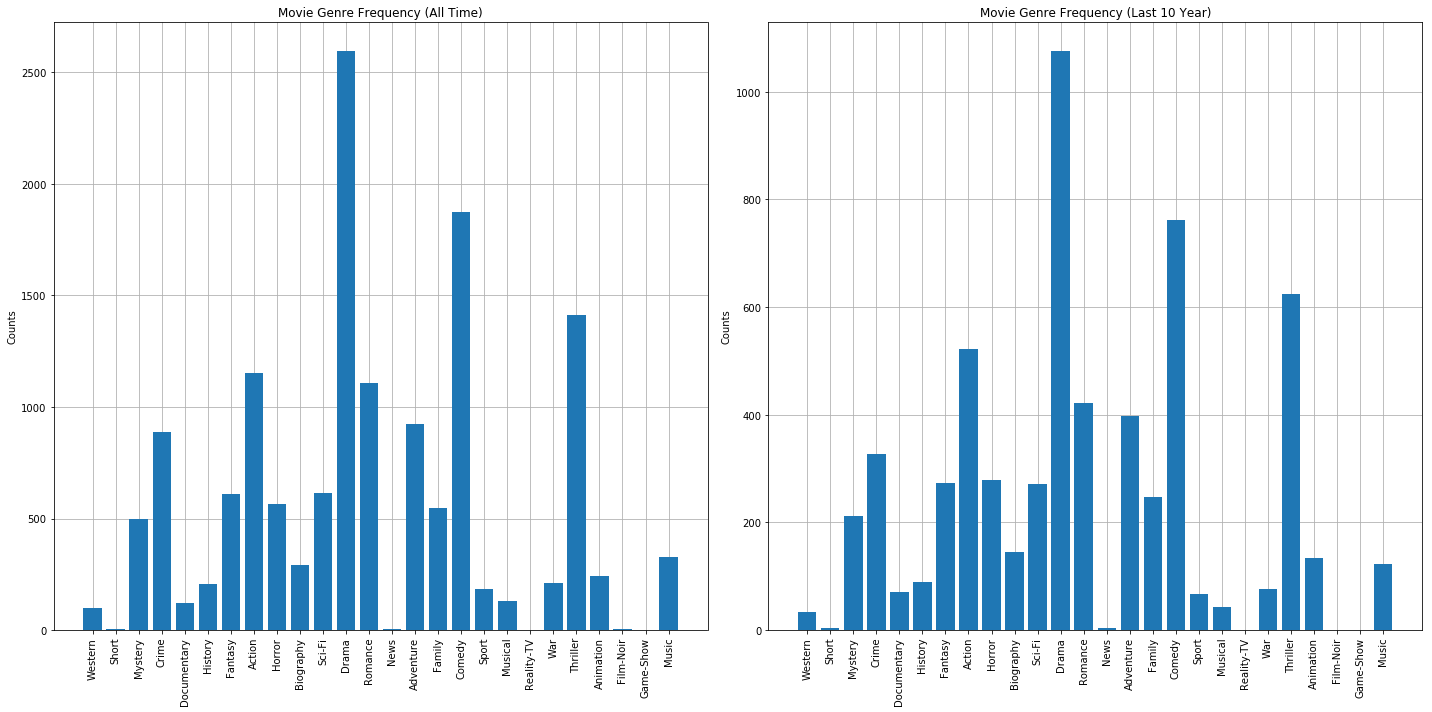

In [402]:
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.bar(x_pos, freq, align = 'center', zorder = 3)
plt.xticks(x_pos, objects, rotation = 90)
plt.ylabel('Counts')
plt.title('Movie Genre Frequency (All Time)')
plt.grid(zorder = 0)

plt.subplot(1, 2, 2)
plt.bar(x_pos, freq_10yr, align = 'center', zorder = 3)
plt.xticks(x_pos, objects, rotation = 90)
plt.ylabel('Counts')
plt.title('Movie Genre Frequency (Last 10 Year)')
plt.grid(zorder = 0)

plt.tight_layout()
plt.show()

From the Bar Chart above, we can seet that Drama is the most popular genre of movies. The the popularity of each genre stayed relatively the same. But looking closely, Action movies are slowly becoming more popular in the last 10 years as you can see the difference between Action and Romance are gradually growing.

Want to focus analysis on Action and Romance

In [403]:
# Locate all the movies with action in the genre excluding romance
act_df = dat_df.loc[lambda x: dat_df['Genre'].str.contains('Action')]
act_df = act_df[act_df['Genre'].str.contains('Romance') == False]

In [404]:
# Locate all the movies with romance in the genre excluding action
rom_df = dat_df.loc[lambda x: dat_df['Genre'].str.contains('Romance')]
rom_df = rom_df[rom_df['Genre'].str.contains('Action') == False]

In [413]:
both_df = dat_df[lambda x: dat_df['Genre'].str.contains('Romance'|'Action') ]

TypeError: unsupported operand type(s) for |: 'str' and 'str'